In [1]:
!pip3 install torch torchvision torchaudio

In [2]:
import torch

In [3]:
torch.__version__

'2.3.0'

In [9]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root='data', train=True,
    transform=ToTensor(),
    download=True,
)
test_data = datasets.MNIST(
    root='data', train=False, transform=ToTensor()
)

In [10]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [11]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [12]:
print(train_data.data.size())

torch.Size([60000, 28, 28])


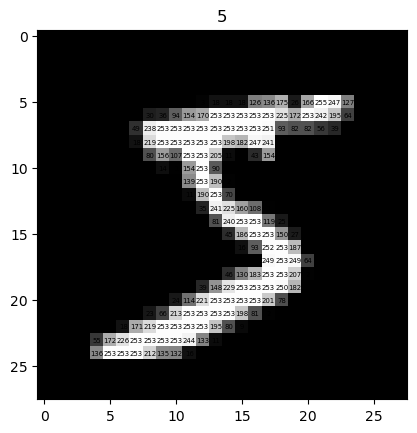

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.imshow(train_data.data[0], cmap="gray")

for i in range(train_data.data[0].shape[0]):
    for j in range(train_data.data[0].shape[1]):
        c = 1 if train_data.data[0][i, j].item() < 128 else 0
        ax.text(j, i, train_data.data[0][i, j].item(), ha="center", va="center", fontsize=5)
plt.title("%i" %train_data.targets[0])
plt.show()

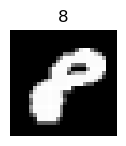

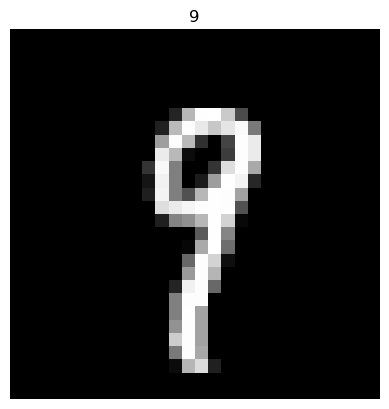

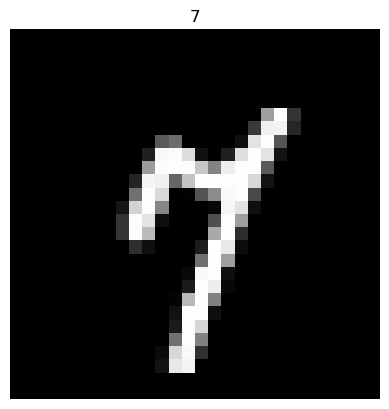

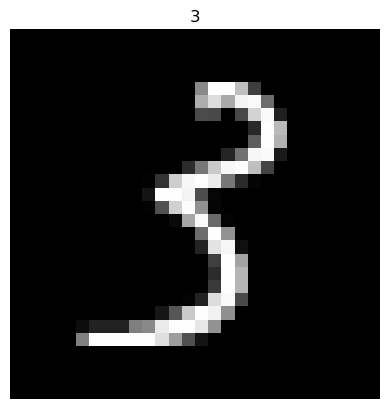

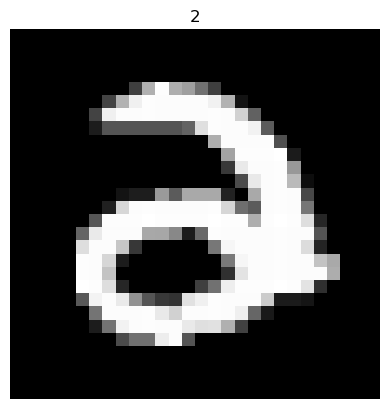

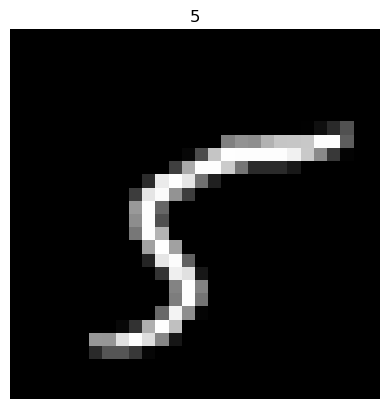

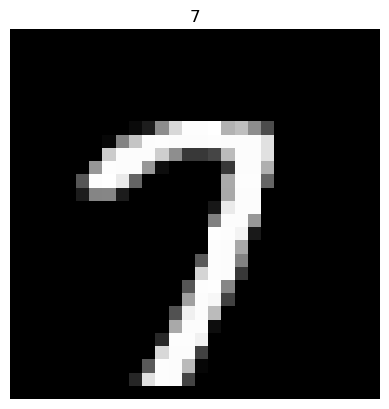

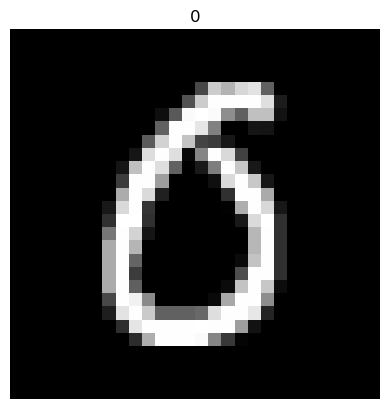

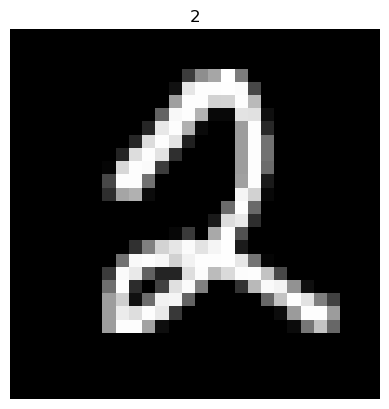

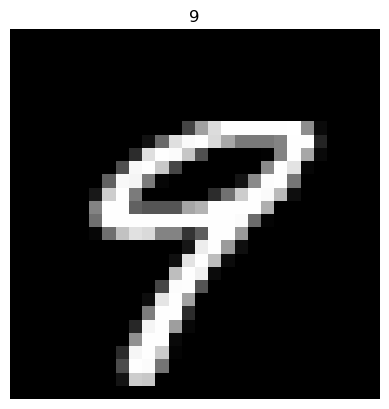

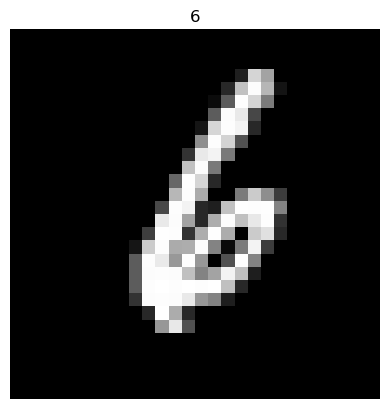

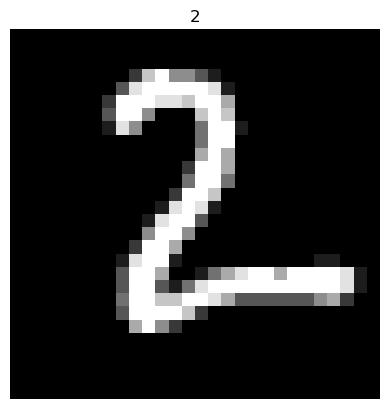

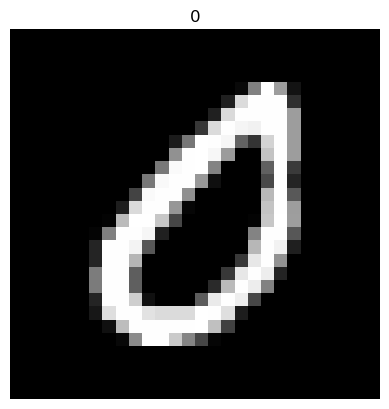

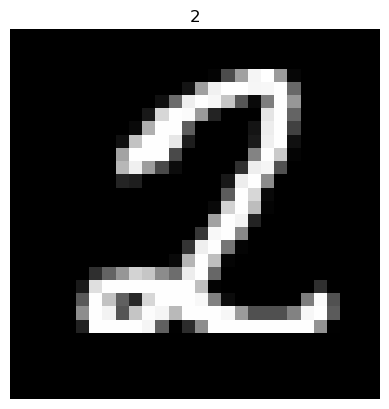

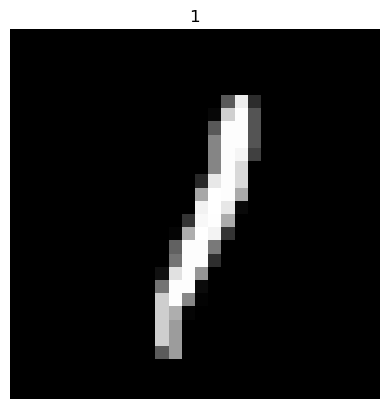

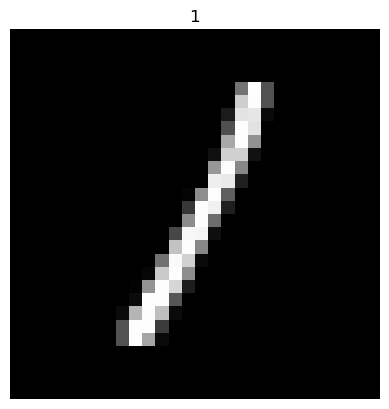

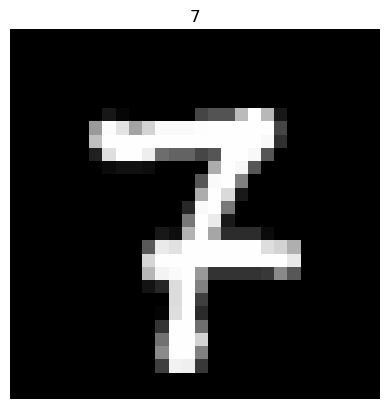

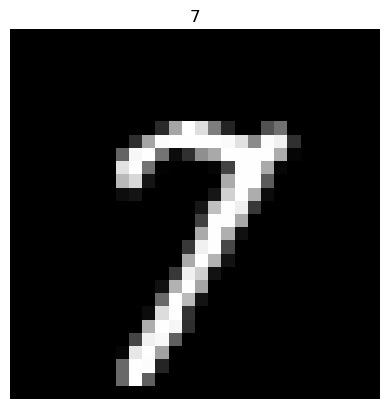

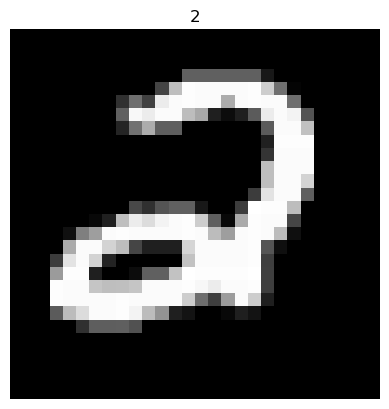

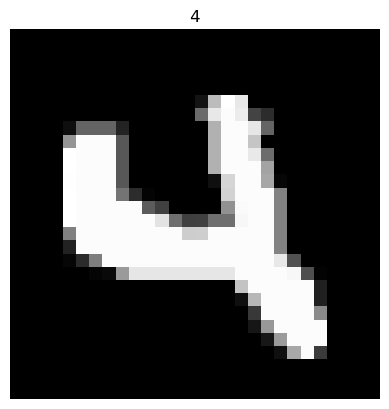

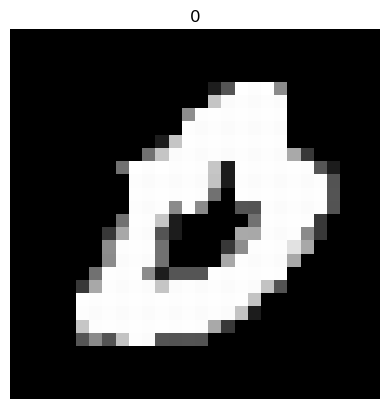

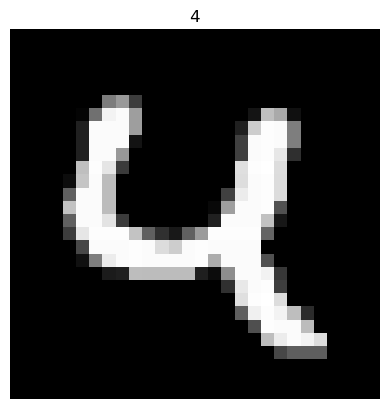

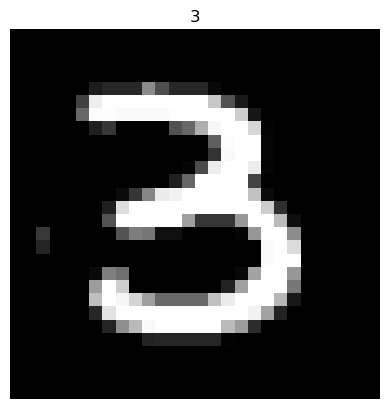

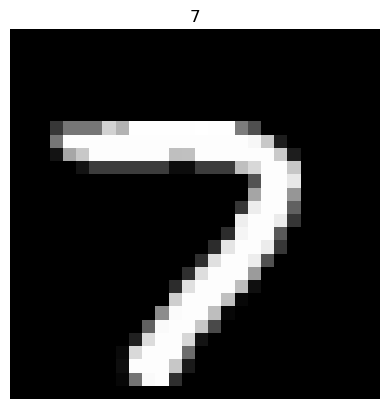

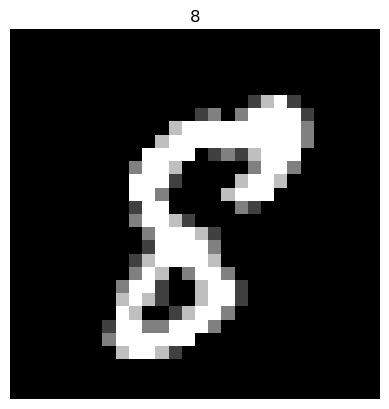

In [14]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    plt.show()

In [15]:
from torch.utils.data import DataLoader

loaders = {
    "train": torch.utils.data.DataLoader(train_data, batch_size=100, shuffle=True, num_workers=1),
    "test": torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=True, num_workers=1)
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x14fce2c50>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x16832fb50>}

In [17]:
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc = torch.nn.Linear(32 * 7 * 7, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [18]:
model = CNN()

In [19]:
model

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)

In [20]:
learning_rate = 0.01
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
training_epochs = 10

In [22]:
total_batch = len(loaders["train"])
for epoch in range(training_epochs):
    avg_cost = 0
    for x, y in loaders["train"]:
        optimizer.zero_grad()
        pred = model(x)
        cost = loss_func(pred, y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
    print("[Epoch: {:>4}] cost = {:>.9}".format(epoch+1, avg_cost))
print("Finished Training")

[Epoch:    1] cost = 0.145883799
[Epoch:    2] cost = 0.0590510108
[Epoch:    3] cost = 0.0479574315
[Epoch:    4] cost = 0.0435728095
[Epoch:    5] cost = 0.0386041217
[Epoch:    6] cost = 0.0377222523
[Epoch:    7] cost = 0.0371019766
[Epoch:    8] cost = 0.0353062339
[Epoch:    9] cost = 0.0321153477
[Epoch:   10] cost = 0.0355213918
Finished Training


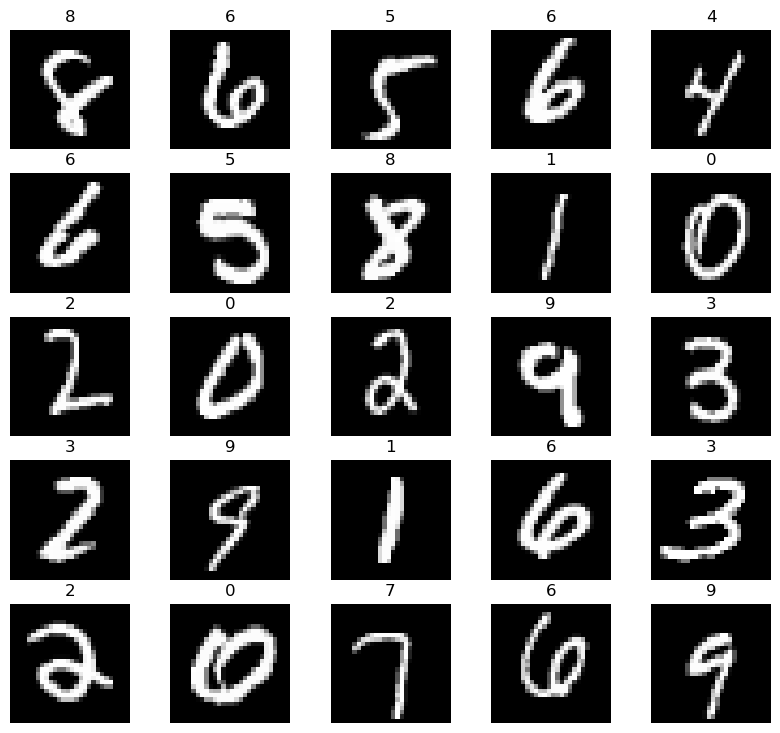

In [23]:
model.eval()
figure = plt.figure(figsize=(10, 9))
cols, rows = 5, 5
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(test_data), size=(1,)).item()
    test_output = model(torch.unsqueeze(loaders["test"].dataset[sample_idx][0], dim=0))
    label = torch.argmax(test_output)
    figure.add_subplot(rows, cols, i)
    plt.title(label.numpy())
    plt.axis("off")
    plt.imshow(loaders["test"].dataset[sample_idx][0].squeeze().detach().numpy(), cmap="gray")
plt.show()